An example of looking at just a Deep Drilling Field location.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.utils import hpid2RaDec, angularSeparation
import healpy as hp
import lsst.sims.maf.plots as plots


In [2]:
database = 'baseline_nexp2_v1.7_10yrs.db'
sqlWhere = 'filter="r"'
opsdb = db.OpsimDatabase(database)
outDir = 'slicers_test'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
# position of a DDF field
ddf_ra = 58.97
ddf_dec = -49.28

nside = 512
ddf_radius = 1.8 

ra, dec = hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

dist_to_ddf = angularSeparation(ra, dec, ddf_ra, ddf_dec)

goodhp = np.where(dist_to_ddf <= ddf_radius)
slicer = slicers.UserPointsSlicer(ra=ra[goodhp], dec=dec[goodhp], useCamera=False, latLonDeg=True)
metric = metrics.Coaddm5Metric()
plotdict = {'nside': nside}
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sqlWhere, plotFuncs=plotFuncs, plotDict=plotdict)

In [4]:
bgroup = metricBundles.MetricBundleGroup({'1':bundle}, opsdb, outDir=outDir, 
                                         resultsDb=resultsDb)

In [5]:
bgroup.runAll()

Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 452001 visits
Running:  ['1']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter="r"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


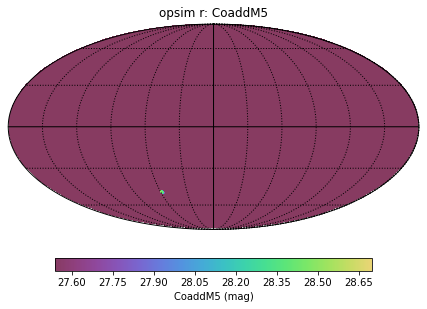

In [6]:
bgroup.plotAll(closefigs=False)

/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:9

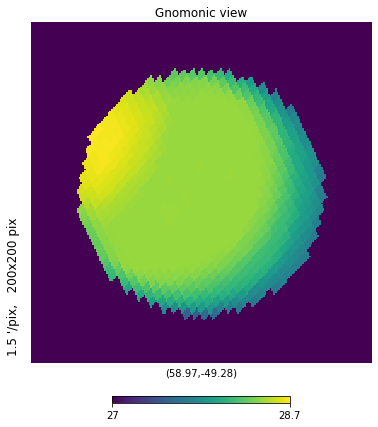

In [7]:
# We can plug the values in and use different projections
# Note, since we did one of the Euclid fields, we can see the overlap caused by the dithering.
bmap = np.zeros(hp.nside2npix(nside))
bmap[goodhp] = bundle.metricValues
hp.gnomview(bmap, rot=(ddf_ra, ddf_dec), min=27)